## Medical Insurance Prediction

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# importing dataset
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Checking for number of rows and columns
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# checking for data statistical description
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\MAC\AppData\Local\Temp\ipykernel_9136\432815942.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


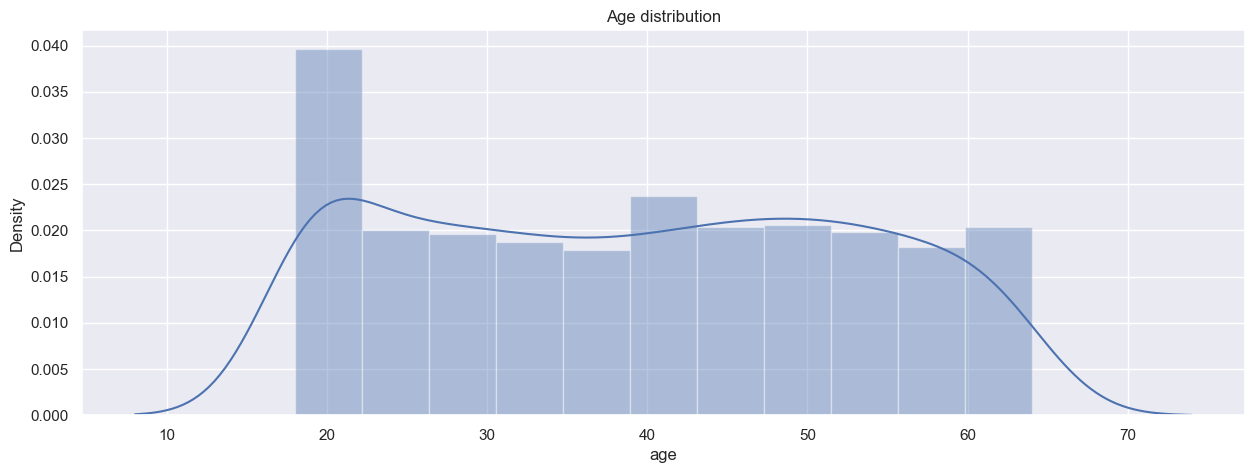

In [11]:
sns.set()
plt.figure(figsize=(15,5))
sns.distplot(df["age"])
plt.title("Age distribution")
plt.show()

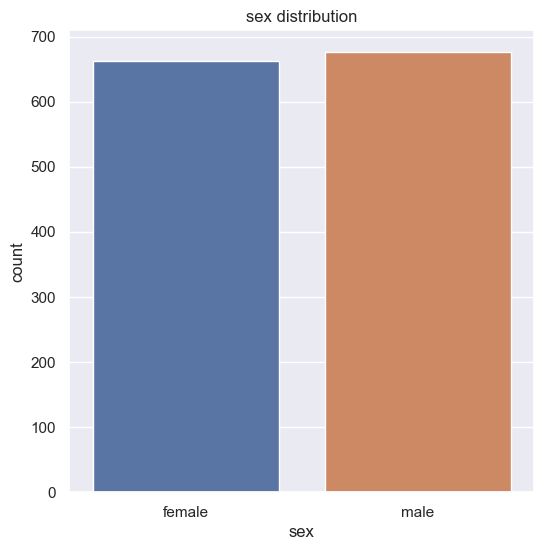

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("sex distribution")
plt.show()

In [13]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\MAC\AppData\Local\Temp\ipykernel_9136\388080848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


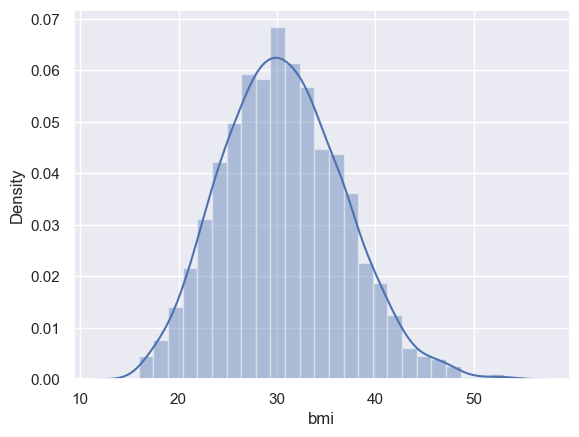

In [14]:
sns.distplot(df["bmi"])
plt.show()

In [15]:
# checking for unique numbers of each region
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
# encode
df.replace({"sex":{"male":0, "female":1}}, inplace=True)

In [17]:
df.replace({"smoker":{"yes":1,"no":0}}, inplace=True)

In [18]:
df.replace({"region":{"southeast":0, "southwest":1,"northeast":2,"northwest":3}}, inplace=True)

In [19]:
x = df.drop(columns="charges", axis=1)
y = df["charges"]

In [20]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [23]:
x_train.shape

(1070, 6)

In [24]:
x_test.shape

(268, 6)

In [25]:
# train the model
model = LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
# predict training set
training_data_pred = model.predict(x_train)

In [28]:
r2_train = metrics.r2_score(y_train,training_data_pred)

In [29]:
r2_train

0.7694497146010393

In [30]:
# for test data
test_data_pred = model.predict(x_test)

In [33]:
r2_test = metrics.r2_score(y_test, test_data_pred)

In [34]:
r2_test

0.6452127951272562

In [35]:
sample_data = (30,1,22.7,0,1,0)

In [36]:
input_data_as_numpy_array = np.asarray(sample_data)

In [37]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [38]:
# prediction
prediction = model.predict(input_data_reshaped)

C:\Users\MAC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
print("the insurance cost is", prediction)

the insurance cost is [25855.13312305]
